In [1]:
import re
import os
import numpy as np
from utils import dict_file
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

np.set_printoptions(precision=8, linewidth=1000)

In [2]:
layers = 2
repeat = 20
fidelity_energy = {}
for model in [1216, 1705]:
    path = f'./data_232/from_classical_to_violation_iter30'  # path of folder
    energy = np.array([loadmat(f'{path}/232_d3_D9_model{model}_iter{i}.mat')['energy'][0][0] for i in range(1, 31)])
    fidelity = np.array([])
    load = loadmat(f'{path}/fidelity_state_pr_model{model}_L{layers}.mat')
    for num_iter in range(1, 31):
        try:
            fidelity_list = [load[f'iter{num_iter}_r{r}_fidelity'][0][0] for r in range(1, repeat + 1)]
            fidelity_mean = np.mean(sorted(fidelity_list, reverse=True)[:5])  # Take the mean of 5 largest values
            if (l := len(fidelity_list)) != repeat:
                print(f'model{model}', l)
        except KeyError:
            fidelity_list = [load[k][0][0] for k in load.keys() if f'iter{num_iter}_' in k and 'fidelity' in k]
            fidelity_mean = max(fidelity_list) if fidelity_list else np.nan
            output = f'L{layers}: ' if num_iter == 1 else ''
            output += f'{len(fidelity_list)} '
            output += '\n' if num_iter == 30 else ''
            print(output, end='')
        fidelity = np.append(fidelity, fidelity_mean)
    fidelity_energy[f'model{model}'] = {'energy': energy, 'fidelity': fidelity}
# savemat(f'./data_232/fidelity_energy_L{layers}.mat', fidelity_energy)
fidelity_energy

{'model1216': {'energy': array([-6.54496597, -6.58293879, -5.30234066, -7.74296699, -5.4208933 , -7.96439643, -7.62728358, -7.24031995, -7.37798185, -7.95691201, -8.8231973 , -9.00246192, -9.00467358, -9.00736493, -9.01016773, -9.01278162, -9.01495481, -9.01651707, -9.01750696, -9.01807633, -9.01838639, -9.01855223, -9.01863931, -9.01868634, -9.01871234, -9.01872617, -9.01873589, -9.01874101, -9.01874415, -9.01874617]),
  'fidelity': array([0.99781436, 0.99773671, 0.99999419, 0.99987111, 0.99999364, 0.99998841, 0.99999599, 0.99994161, 0.99998617, 0.99986527, 0.9999754 , 0.99996901, 0.9999673 , 0.9999752 , 0.99954348, 0.9999657 , 0.99994719, 0.99996607, 0.99994668, 0.99994631, 0.99994946, 0.99995364, 0.99993048, 0.99994436, 0.99993632, 0.99992408, 0.99994109, 0.99993354, 0.99994052, 0.99992615])},
 'model1705': {'energy': array([-3.01886004, -3.02399595, -4.32122591, -3.0561892 , -4.69127076, -4.92110616, -4.9988427 , -5.01957623, -5.02002791, -5.03247731, -5.03829471, -5.04035811, -5.0

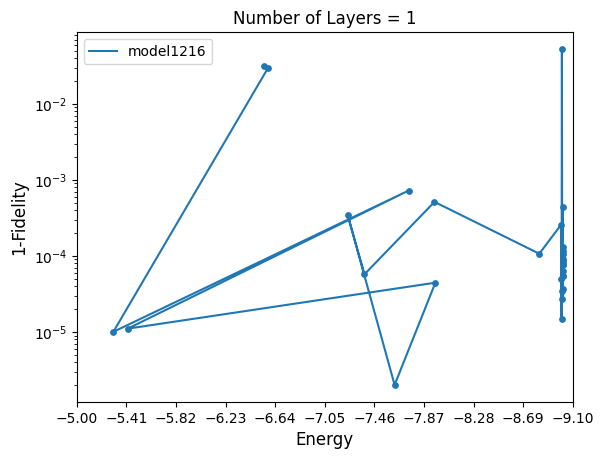

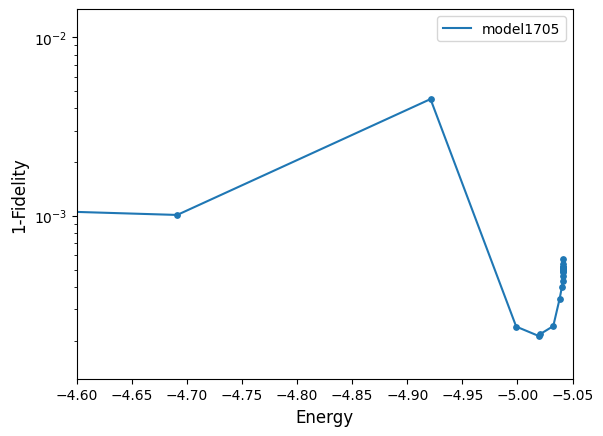

In [3]:
# iter30 L1 model1216r20 model1705r20 [:5]
xlim = {1216: [-5.0, -9.1, 11], 1705: [-4.6, -5.05, 10]}
plt.title(f'Number of Layers = {layers}')
for model in [1216, 1705]:
    energy = fidelity_energy[f'model{model}']['energy']
    fidelity = 1 - fidelity_energy[f'model{model}']['fidelity']
    plt.plot(energy, fidelity, label=f'model{model}')
    plt.scatter(energy, fidelity, s=15)
    xmin, xmax, step = xlim[model]
    plt.xlim(xmin, xmax)
    plt.xticks(np.linspace(xmax, xmin, step))
    plt.ylabel('1-Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()

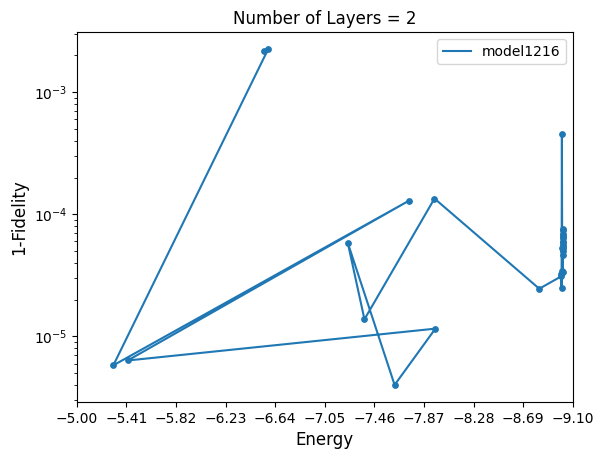

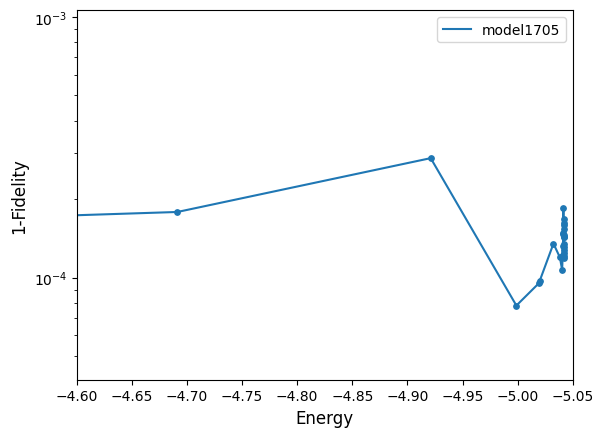

In [3]:
# iter30 L2 model1216r20 model1705r20 [:5]
xlim = {1216: [-5.0, -9.1, 11], 1705: [-4.6, -5.05, 10]}
plt.title(f'Number of Layers = {layers}')
for model in [1216, 1705]:
    energy = fidelity_energy[f'model{model}']['energy']
    fidelity = 1 - fidelity_energy[f'model{model}']['fidelity']
    plt.plot(energy, fidelity, label=f'model{model}')
    plt.scatter(energy, fidelity, s=15)
    xmin, xmax, step = xlim[model]
    plt.xlim(xmin, xmax)
    plt.xticks(np.linspace(xmax, xmin, step))
    plt.ylabel('1-Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()

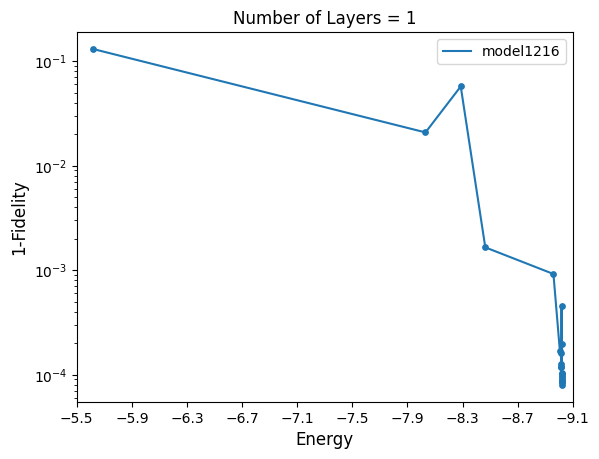

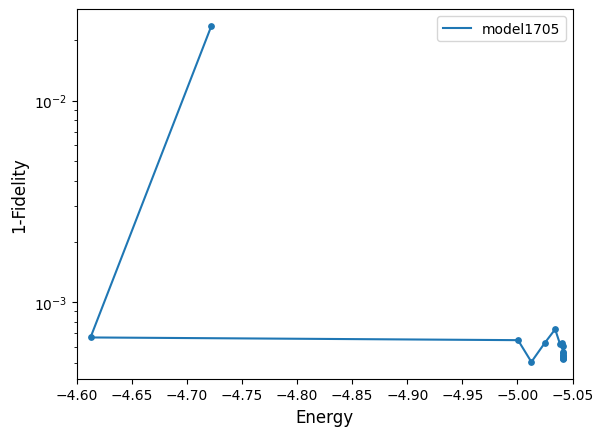

In [3]:
# iter20 L1 model1216r20 model1705r20 [:5]
xlim = {1216: [-5.5, -9.1], 1705: [-4.6, -5.05]}
plt.title(f'Number of Layers = {layers}')
for model in [1216, 1705]:
    energy = fidelity_energy[f'model{model}']['energy']
    fidelity = 1 - fidelity_energy[f'model{model}']['fidelity']
    plt.plot(energy, fidelity, label=f'model{model}')
    plt.scatter(energy, fidelity, s=15)
    xmin, xmax = xlim[model]
    plt.xlim(xmin, xmax)
    plt.xticks(np.linspace(xmax, xmin, 10))
    plt.ylabel('1-Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()

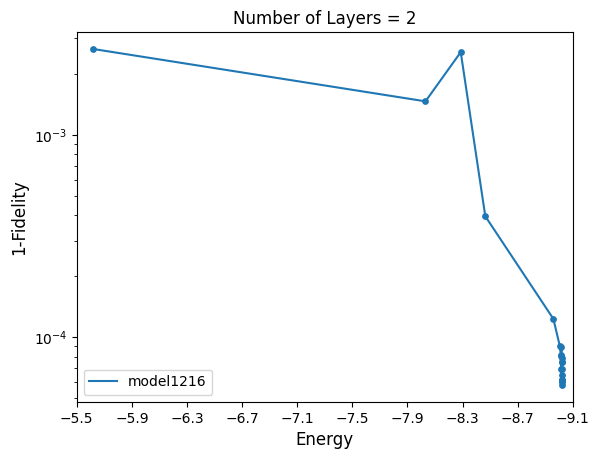

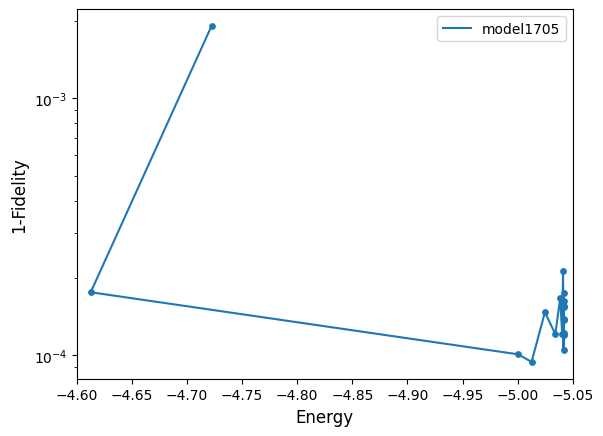

In [3]:
# iter20 L2 model1216r20 model1705r20 [:5]
xlim = {1216: [-5.5, -9.1], 1705: [-4.6, -5.05]}
plt.title(f'Number of Layers = {layers}')
for model in [1216, 1705]:
    energy = fidelity_energy[f'model{model}']['energy']
    fidelity = 1 - fidelity_energy[f'model{model}']['fidelity']
    plt.plot(energy, fidelity, label=f'model{model}')
    plt.scatter(energy, fidelity, s=15)
    xmin, xmax = xlim[model]
    plt.xlim(xmin, xmax)
    plt.xticks(np.linspace(xmax, xmin, 10))
    plt.ylabel('1-Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.yscale('log')
    plt.legend()
    plt.show()

In [2]:
layers = 1
fidelity_energy = {}
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    D = 5  # for D in [5, 6, 7, 8, 9]:
    energy = loadmat(f'{path}/energy_num{num}_D{D}.mat')['energy'][0]
    fidelity = np.array([])
    load = loadmat(f'{path}/fidelity_state_pr_num{num}_L{layers}.mat')
    for vec in range(1, 41):
        fidelity_list = [load[f'D{D}_vec{vec}_r{r}_fidelity'][0][0] for r in range(1, 4)]
        fidelity = np.append(fidelity, max(fidelity_list))  # Take the largest values
    fidelity_energy[f'num{num}_D{D}'] = {'energy': energy, 'fidelity': fidelity}
# savemat(f'./data_322/fidelity_energy_L{layers}.mat', fidelity_energy)
fidelity_energy

{'num1_D5': {'energy': array([-5.99999983, -6.00003814, -6.00160177, -6.00530301, -6.00950478, -6.01475029, -6.02106081, -6.02838091, -6.03664611, -6.04578503, -6.05572049, -6.06637056, -6.07764963, -6.08946944, -6.10174006, -6.11437073, -6.12727069, -6.14034993, -6.15351979, -6.16669354, -6.17978687, -6.19271825, -6.20540933, -6.21778519, -6.22977459, -6.24131015, -6.2523285 , -6.2627704 , -6.27258087, -6.28170919, -6.29010905, -6.29773848, -6.30455998, -6.31054049, -6.31565139, -6.31986855, -6.32317232, -6.3255475 , -6.3269834 , -6.32747377]),
  'fidelity': array([0.98691822, 0.96636991, 0.58100289, 0.49404412, 0.49988699, 0.49997705, 0.50001126, 0.4999938 , 0.50000372, 0.49999762, 0.49999839, 0.49999887, 0.49999917, 0.49999938, 0.49999952, 0.50000038, 0.50000031, 0.49999975, 0.49999979, 0.49999982, 0.49999985, 0.50000013, 0.50000012, 0.4999999 , 0.50000009, 0.49999992, 0.50000008, 0.49999993, 0.49999993, 0.50000006, 0.49999994, 0.49999994, 0.49999995, 0.49999995, 0.49999995, 0.49999

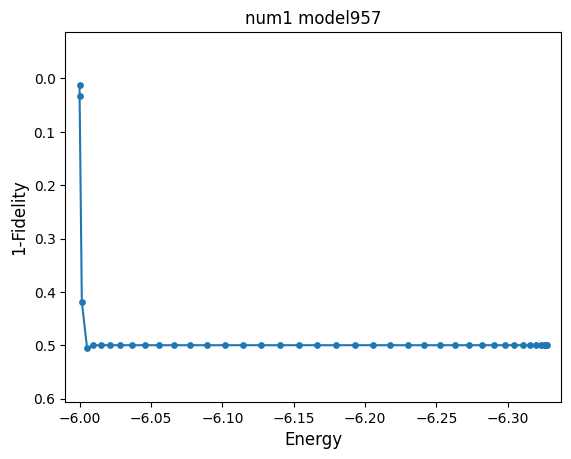

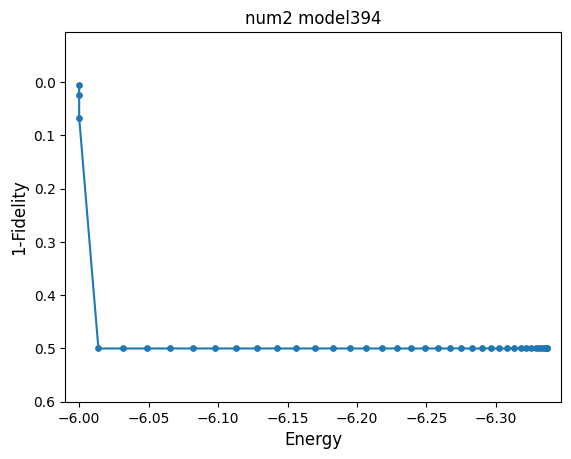

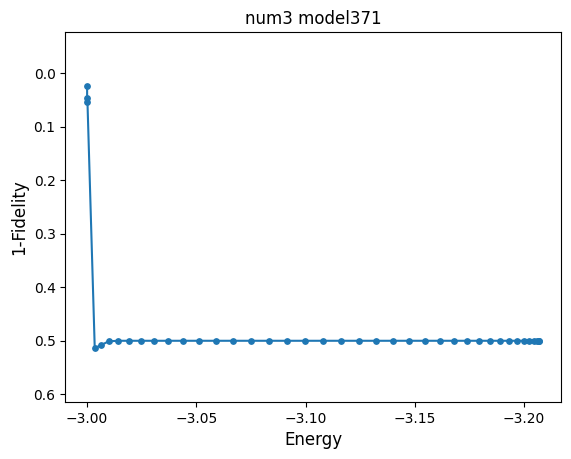

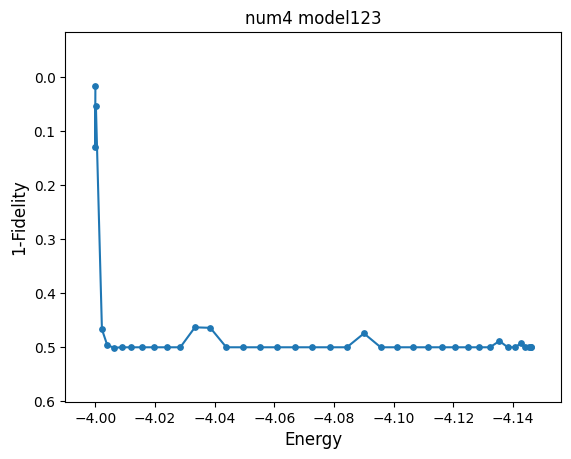

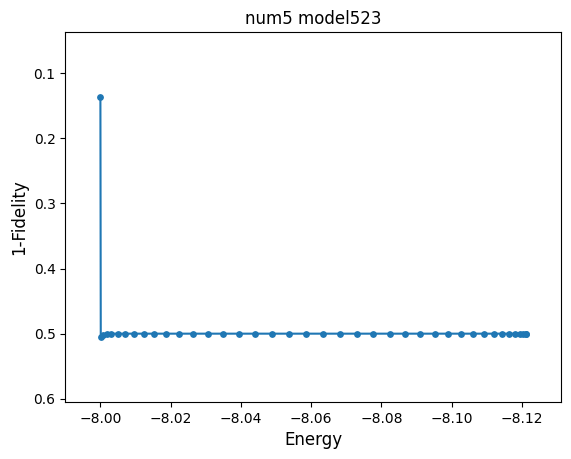

In [3]:
# layers = 1 num1~5 r3 max(fidelity_list)
D = 5  # only done D5, no need for D6~9
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    model = re.search('model(\d+)', sub).group(1)
    energy = fidelity_energy[f'num{num}_D{D}']['energy']
    fidelity = 1 - fidelity_energy[f'num{num}_D{D}']['fidelity']
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylim(max(fidelity) + 0.1, min(fidelity) - 0.1)
    plt.plot(energy, fidelity, label=f'D{D}')
    plt.title(f'num{num} model{model}')
    plt.scatter(energy, fidelity, s=15)
    plt.ylabel('1-Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.show()

In [3]:
layers = 2
fidelity_energy = {}
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    for D in [5, 6, 7, 8, 9]:
        energy = loadmat(f'{path}/energy_num{num}_D{D}.mat')['energy'][0]
        fidelity_dict = {vec: loadmat(f'{path}/fidelity_num{num}_D{D}_L{layers}.mat')[f'vec{vec}'][0] for vec in range(1, 41)}
        fidelity = np.array([])
        for v in fidelity_dict.values():
            v_mean = np.mean(sorted(v, reverse=True)[:10]) # Take the mean of 10 largest values
            fidelity = np.append(fidelity, v_mean)
        fidelity_energy[f'num{num}_D{D}'] = {'energy': energy, 'fidelity': fidelity}
# savemat(f'./data_322/fidelity_energy_L{layers}.mat', fidelity_energy)
fidelity_energy

{'num1_D5': {'energy': array([-5.99999983, -6.00003814, -6.00160177, -6.00530301, -6.00950478, -6.01475029, -6.02106081, -6.02838091, -6.03664611, -6.04578503, -6.05572049, -6.06637056, -6.07764963, -6.08946944, -6.10174006, -6.11437073, -6.12727069, -6.14034993, -6.15351979, -6.16669354, -6.17978687, -6.19271825, -6.20540933, -6.21778519, -6.22977459, -6.24131015, -6.2523285 , -6.2627704 , -6.27258087, -6.28170919, -6.29010905, -6.29773848, -6.30455998, -6.31054049, -6.31565139, -6.31986855, -6.32317232, -6.3255475 , -6.3269834 , -6.32747377]),
  'fidelity': array([0.99919418, 0.99659635, 0.9951644 , 0.99944457, 0.99995587, 0.99998525, 0.99999182, 0.9999953 , 0.99999621, 0.99999788, 0.99999821, 0.99999838, 0.99999933, 0.99999904, 0.9999993 , 0.9999994 , 0.99999941, 0.99999935, 0.99999966, 0.9999996 , 0.99999954, 0.99999973, 0.99999958, 0.99999968, 0.99999978, 0.99999975, 0.99999951, 0.99999922, 0.99999965, 0.9999997 , 0.99999969, 0.99999981, 0.99999983, 0.99999987, 0.99999979, 0.99999

In [ ]:
dim = [5, 6, 7, 8, 9]
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    for D in dim:
        energy = loadmat(f'{path}/energy_num{num}_D{D}.mat')['energy'][0]
        fidelity_dict = {vec: loadmat(f'{path}/fidelity_num{num}_D{D}_L2.mat')[f'vec{vec}'][0] for vec in range(1, 41)}
        fidelity = np.array([])
        for v in fidelity_dict.values():
            for i in range(3):  # number of data cleaning times to remove outliers
                v = np.array([x for x in v if abs(x - v.mean()) < v.std()])
            fidelity = np.append(fidelity, v.mean())

        fig, (ax1, ax2) = plt.subplots(1, 2)
        plt.suptitle(f'   No.{num}', fontsize=16)
        plt.rcParams['font.family'] = 'Times New Roman'

        ax1.set_xlim(max(energy) + 0.01, min(energy) - 0.01)
        ax1.plot(energy, fidelity, linewidth=2)
        ax1.scatter(energy, fidelity, s=30)
        ax1.set_ylabel('Fidelity', fontsize=16)
        ax1.set_xlabel('Energy', fontsize=16)
        ax1.set_position([0.12, 0.11, 0.85, 0.82])

        fidelity = 1 - fidelity
        ax2.set_xlim(max(energy) + 0.01, min(energy) - 0.01)
        ax2.set_ylim(max(fidelity) * 2, min(fidelity) / 2)
        ax2.plot(energy, fidelity, color='g', linewidth=2)
        ax2.scatter(energy, fidelity, color='g', s=30)
        ax2.set_ylabel('1-Fidelity', fontsize=14)
        ax2.set_xlabel('Energy', fontsize=14)
        ax2.set_position([0.28, 0.23, 0.65, 0.6])
        ax2.set_yscale('log')

        # plt.savefig(f'./data_322/img/322_num{num}_D{D}.pdf')
        plt.show()

In [ ]:
dim = [5, 6, 7, 8, 9]
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    plt.figure(figsize=(15, 5))
    for D in dim:
        energy = loadmat(f'{path}/energy_num{num}_D{D}.mat')['energy'][0]
        fidelity_dict = {vec: loadmat(f'{path}/fidelity_num{num}_D{D}_L2.mat')[f'vec{vec}'][0] for vec in range(1, 41)}
        fidelity = np.array([])
        for v in fidelity_dict.values():
            for i in range(3):  # number of data cleaning times to remove outliers
                if D == 9 and i == 2:  # for now D=9 only has 10 data points
                    break
                v = np.array([x for x in v if abs(x - v.mean()) < v.std()])
            fidelity = np.append(fidelity, v.mean())
        plt.suptitle(sub, fontsize=14)

        plt.subplot(1, 2, 1)
        plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
        plt.plot(energy, fidelity, label=f'D{D}')
        plt.scatter(energy, fidelity, s=20)
        plt.ylabel('Fidelity', fontsize=12)
        plt.xlabel('Energy', fontsize=12)
        plt.legend(loc='right')

        plt.subplot(1, 2, 2)
        fidelity = 1 - fidelity
        plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
        plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
        plt.plot(energy, fidelity, label=f'D{D}')
        plt.scatter(energy, fidelity, s=20)
        plt.ylabel('1-Fidelity', fontsize=12)
        plt.xlabel('Energy', fontsize=12)
        plt.legend(loc='right')
        plt.yscale('log')
    D_str = f'{dim[0]}-{dim[-1]}' if len(dim) > 1 else dim[0]
    # plt.savefig(f'./data_322/img/322_{sub}_D{D_str}.png')
    plt.show()

In [ ]:
dim = [5, 9]
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    plt.figure(figsize=(15, 5))
    for D in dim:
        fidelity = loadmat(f'{path}/fidelity_num{num}_D{D}_L2.mat')['fidelity'][0]
        energy = loadmat(f'{path}/energy_num{num}_D{D}.mat')['energy'][0]
        plt.suptitle(sub, fontsize=14)

        plt.subplot(1, 2, 1)
        plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
        plt.plot(energy, fidelity, label=f'D{D}')
        plt.scatter(energy, fidelity, s=20)
        plt.ylabel('Fidelity', fontsize=12)
        plt.xlabel('Energy', fontsize=12)
        plt.legend(loc='right')

        plt.subplot(1, 2, 2)
        fidelity = 1 - fidelity
        plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
        plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
        plt.plot(energy, fidelity, label=f'D{D}')
        plt.scatter(energy, fidelity, s=20)
        plt.ylabel('1-Fidelity', fontsize=12)
        plt.xlabel('Energy', fontsize=12)
        plt.legend(loc='right')
        plt.yscale('log')
    # plt.savefig(f'./data_322/img/322_{sub}.png')
    plt.show()

In [ ]:
def plot(energy, fidelity):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylabel('Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.scatter(energy, fidelity)
    plt.plot(energy, fidelity)

    plt.subplot(1, 2, 2)
    fidelity = 1 - fidelity
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
    plt.ylabel('1 - Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.scatter(energy, fidelity)
    plt.plot(energy, fidelity)
    plt.yscale('log')
    plt.show()

In [ ]:
# Save energy list mat
D = 9
for num in range(1, 6):
    sub = [i for i in sorted(os.listdir('./data_322')) if f'num{num}' in i][0]
    path = f'./data_322/{sub}'  # path of subfolder
    key = lambda x: [int(y) if y.isdigit() else y for y in re.split('(\d+)', x)]
    uMPS_name = [i for i in dict_file(f'{path}/uMPS').values() if f'num{num}' and f'D{D}' in i]  # uMPS file name
    uMPS_name = sorted(uMPS_name, key=key)  # sort 1,10,11,...,2 into 1,2,...,10,11
    energy = np.array([loadmat(f'{path}/uMPS/{uMPS_name[i]}')['energy'][0][0] for i in range(len(uMPS_name))])
    # savemat(f'{path}/energy_num{num}_D{D}.mat', {'energy': energy})
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylabel('Ergodic', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    ergodic = np.arange(len(energy))
    plt.scatter(energy, ergodic)
    plt.plot(energy, ergodic)
    plt.show()

In [ ]:
# 2024-01-17 D5_L2, Eval: 1000, loss_tol: 1e-12, gtol: 1e-12
ind, num = 0, 1
path = f'./data_322/old_mat'  # path of subfolder
fidelity = loadmat(f'{path}/fidelity_D5_L2_1000.mat')[f'{num}'][0]
energy = loadmat(f'{path}/energy_D5.mat')[f'{num}'][0]
print('Number of vec:', len(fidelity))
fidelity = fidelity[ind:]
energy = energy[ind:]
plot(energy, fidelity)

In [ ]:
energy_list = {}
for num in range(1, 6):
    path = f'./data_322/old_mat'  # path of subfolder
    key = lambda x: [int(y) if y.isdigit() else y for y in re.split('(\d+)', x)]
    uMPS_name = [i for i in dict_file(f'{path}/uMPS').values() if f'num{num}' in i]  # uMPS file name
    uMPS_name = sorted(uMPS_name, key=key)  # sort 1,10,11,...,2 into 1,2,...,10,11
    uMPS_num = len(uMPS_name)  # number of uMPS in subfolder
    energy = np.array([loadmat(f'{path}/uMPS/{uMPS_name[i]}')['energy'][0][0] for i in range(uMPS_num)])
    energy_list.update({f'{num}': energy})
# savemat(f'{path}/energy_D5.mat', energy_list)
energy_list

In [ ]:
path = f'./data_322/old_mat'  # path of subfolder
fidelity_list = {  # D5_L2_1000
    '1': [
        0.9981289692291885, 0.9996502776244797, 0.9999977325183597, 0.9999999538165608, 0.9999999631621687,
        0.9999999981178249, 0.9999999990491908, 0.9999999870247909, 0.9999999995325286, 0.999999996890498,
        0.9999999996435106, 0.9999999963128423, 0.99999999980957, 0.999999999235185, 0.9999999075029564,
        0.9999999990564923, 0.999999999366403, 0.999999999314469, 0.9999999993636202
    ],
    '2': [
        0.9981389382415938, 0.9999956457715545, 0.9999999989847725, 0.9999999992166471, 0.9999999994119264,
        0.9999999838276614, 0.9999999996881306, 0.9999999977291498, 0.9999999991503257, 0.9999999997033882,
        0.9999999896057856, 0.9999999300315521, 0.9999999998494975, 0.9999999998906166
    ],
    '3': [
        0.9989512240456557, 0.9999786804047124, 0.9999999465087674, 0.9999999798641659, 0.9999999946718774,
        0.9999999972457114, 0.9999999978088169, 0.9999999983712343, 0.9999999979912063, 0.9999999999990524,
        0.9999999983332415, 0.9999999901724372, 0.9999999978404583, 0.9999999999990449, 0.9999999438055598,
        0.9999999997751509, 0.9999999974705225, 0.9999999707900001, 0.9999998734971867, 0.9999999970784021,
        0.999999959234005, 0.9999999977125996, 0.9999999992892423, 0.9999999864215898, 0.9999999978886928,
        0.9999999996152665, 0.9999999854520261
    ],
    '4': [
        0.9656594608333953, 0.9999999488783722, 0.9999999966379637, 0.9999999959912085, 0.9999999993446539,
        0.9999999964659846, 0.9999999948222436, 0.9999999985258305, 0.9999998942063467, 0.9999999988240501,
        0.9999999605588056, 0.9999999783544692, 0.9999999962843825, 0.9999999976736509, 0.9999999724574212,
        0.9999999979586802, 0.9999999976737428, 0.9999999922975977, 0.999999995683543, 0.9999999986328687,
        0.999999996570117, 0.99999999365461, 0.9999999964703045, 0.9999999935444874, 0.9999999968145721,
        0.9999999999990123, 0.9999999299585973, 0.9999999857817421, 0.9999999553321547
    ],
    '5': [
        0.9995150962808503, 0.9999999779451315, 0.9999999734990139, 0.9999999996027182, 0.9999999313142587,
        0.9999999998956567, 0.999999971373524, 0.9999999998434825, 0.9999999359663397, 0.9999999998980577,
        0.9999999993656031, 0.9999999046012363, 0.9999999353031803, 0.9999999999006519, 0.9999999998807851,
        0.9999999998763585, 0.9999999727034927, 0.9999999482890065, 0.9999999997819247, 0.999999873765143,
        0.9999999901369732, 0.9999999989891394
    ]
}
# savemat(f'{path}/fidelity_D5_L2_1000.mat', fidelity_list)

In [ ]:
# 2024-01-17 D5_L2, Eval: 500, loss_tol: 1e-12, gtol: 1e-12
ind, num = 0, 1
path = f'./data_322/old_mat'  # path of subfolder
fidelity = loadmat(f'{path}/fidelity_D5_L2_500.mat')[f'{num}'][0]
energy = loadmat(f'{path}/energy_D5.mat')[f'{num}'][0]
print('Number of vec:', len(fidelity))
fidelity = fidelity[ind:]
energy = energy[ind:]
plot(energy, fidelity)

In [ ]:
path = f'./data_322/old_mat'  # path of subfolder
fidelity_list = {  # D5_L2_500
    '1': [
        0.9963501115273821, 0.9986255378358114, 0.9999968049307384, 0.9999997914850758, 0.9999997630235711,
        0.9999994795736982, 0.9999994315750385, 0.9999996991612291, 0.9999999513689395, 0.999999756578521,
        0.9999997569946619, 0.9999999668131621, 0.9999999571274998, 0.9999994559845724, 0.999999877044508,
        0.9999997666967089, 0.9999994142024324, 0.9999994079751954, 0.9999991333469795
    ],
    '2': [
        0.9936371491921793, 0.9998413895065205, 0.9999999238848767, 0.9999998261529646, 0.9999998730835418,
        0.9999992583367974, 0.9999999490655138, 0.9999999782529083, 0.9999994306438991, 0.99999998229514,
        0.9999995634555819, 0.9999986772332452, 0.9999997568556303, 0.9999992261914328
    ],
    '3': [
        0.9977384054625194, 0.9989687621056889, 0.9999994980624193, 0.9999998579236938, 0.999999554952602,
        0.9999987500964322, 0.9999964864347995, 0.9999982856647585, 0.999999453573, 0.9999995551704526,
        0.9999992718846639, 0.9999999701829814, 0.9999993775394753, 0.9999991911909039, 0.9999998769643839,
        0.9999991063364582, 0.999999593737054, 0.9999974337587729, 0.999997273117633, 0.9999999094956995,
        0.9999944776719654, 0.9999975582651637, 0.9999989867138329, 0.9999999730393971, 0.999999342961981,
        0.9999998004654385, 0.999999997472015
    ],
    '4': [
        0.9765102570471846, 0.9999995635887, 0.9999990165586237, 0.999999992722676, 0.9999996115552525,
        0.9999999939486682, 0.9999994060639792, 0.9999999988290807, 0.9999999081528654, 0.9999999932183138,
        0.9999999968256156, 0.9999998277365552, 0.9999998261919906, 0.9999995425325316, 0.9999999925807567,
        0.999999992429967, 0.9999999511651126, 0.9999990913965662, 0.9999997524760061, 0.9999998121900529,
        0.9999999925896396, 0.9999984536591913, 0.9999990869493365, 0.9999998197242934, 0.9999998796175735,
        0.9999998446402523, 0.999999917076173, 0.9999987717367818, 0.9999998005328963
    ],
    '5': [
        0.9985610759892491, 0.9999990120382192, 0.9999999505590405, 0.9999988868487458, 0.9999977908663584,
        0.9999998749916754, 0.9999988653547986, 0.9999998866431019, 0.9999998604243351, 0.9999999619204065,
        0.9999990184561406, 0.9999996040823064, 0.999999830276298, 0.9999996156967483, 0.9999995599043443,
        0.9999999765103684, 0.9999991302137238, 0.9999862447852008, 0.9999999856409315, 0.9999992354414939,
        0.9999997374931163, 0.9999986284809315
    ]
}
# savemat(f'{path}/fidelity_D5_L2_500.mat', fidelity_list)